<font face="Times New Roman" size="3">
<hr style="width:100%;height:2px;color:black">
<div style="width:100%">
    <div style="float:left;width:50%">Albert-Ludwigs-Universität Freiburg</div>
    <div style="float:left;width:50%;text-align:right">Wintersemester 2022/23</div> 
</div>
<div style="clear:both;text-align:center">
    <h1 style="margin-top:20px;padding:0px">Datenanalyse für Naturwissenschaftler*Innen</h1>
    <h2 style="margin:5px;padding:0px">Statistische Methoden in Theorie und Praxis</h2>
    Vorlesung: Dr. Andrea Knue<br />
    Übungsleitung: Dr. Constantin Heidegger<br />
    <h1 style="margin:10px;padding:0px">Übung 3</h1>
    Ausgabe: 4. November 2022 10:00 Uhr, Abgabe: 11. November 2022 bis 10:00 Uhr via Ilias
</div>
<hr style="font-family:width:100%;height:2px;color:black">
</font>

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 4: Zwei- und dreidimensionale Verteilungen (9P)</h3>
</font>

In dieser Aufgabe wollen wir das Erstellen und Darstellen von zweidimensionalen Verteilungen üben. Hierzu binden wir zunächst die zwei wesentlichen Bibliotheken ein, die wir brauchen:

In [11]:
import matplotlib.pyplot as plt
import numpy as np


<font face="Times New Roman" size=4>
a) Scatter Plot (2P)
</font>

Verwenden Sie `numpy`'s `random` Modul um zwei Listen $x,y$ mit jeweils 1M Zahlen entsprechend der Normalverteilung zu würfeln. Die zwei Listen sollen die $x$ und $y$ Werte von zweidimensionalen Punkten darstellen (Beispiel: $x[0]$ und $y[0]$ gehoeren zusammen).

In [12]:
x = np.random.normal(0,1,1000000)
y = np.random.normal(0,1,1000000)


Erzeugen Sie einen sogenannten "Scatter" Plot, also ein zweidimensionales Diagramm in dem jeder Punkt entsprechend seiner $x$ und $y$ Werte eingezeichnet wird (die benoetigte Funktion heißt auch `scatter`). Je dichter der Plot, desto mehr Punkte befinden sich in der gleichen Fläche. Vergessen Sie nicht die Achsen zu bezeichnen, und setzen Sie sogenannte Ticks (also kleine Einteilungen auf den Achsen, die beim Ablesen der Werte entlang der Achsen helfen) auf beide Achsen. (Ticks und Achsenbezeichnungen werden fortan grundsätzlich bei allen Diagrammen erwartet und in die Punktevergabe mit einbezogen.) Zeichnen Sie diesen Scatterplot mit der Option "cmap=plt.cm.jet". 

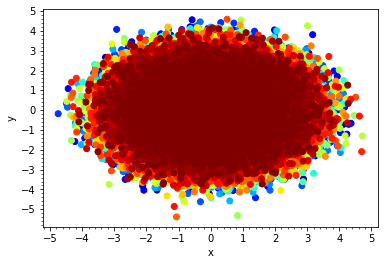

In [13]:
t = np.arange(1000000)
plt.scatter(x, y, c=t, cmap=plt.cm.jet)
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(-5, 6))
plt.yticks(range(-5, 6))
plt.minorticks_on()
plt.show()


<font face="Times New Roman" size=4>
b) Zweidimensionales Histogramm (2P)
</font>

Betrachten Sie die folgenden zwei Variablen:

In [14]:
# Die gewuenschten Mittelwerte des Datensatzes der simuliert werden soll.
# Laenge [mm], Gewicht [g], Zeit t auf dem Laufrad [min]
mu = np.array([9.0, 22.0, 120.0])

# Die gewuenschte Kovarianzmatrix
V = np.array([
        [  5.40, +3.75, 7.00],
        [ +3.75,  7.50,  -34.50],
        [ 7.00,  -34.50,  250.25]
    ])

Hier sind nun also drei Observablen gegeben: die Länge, das Gewicht, und die Laufzeit einer Maus im Laufrad. Die Observablen sind über die in `V` gegebene Kovarianzmatrix verknüpft. Verwenden Sie `np.random`'s `multivariate_normal` Funktion um sich die Werte eines simulierten Datensatzes mit 40000 Einträgen für diese drei Variablen generieren zu lassen. 

In [15]:
L, m, t = np.random.multivariate_normal(mu, V, 40000).T

/var/folders/hy/jy4kjcxj6q96t_6x75rjt_fr0000gn/T/ipykernel_6752/327699821.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  L, m, t = np.random.multivariate_normal(mu, V, 40000).T


Erstellen Sie nun ein zweidimensionales Histogram mit `pyplot` und tragen Sie dort die Länge ($x$ Achse) und das Gewicht ($y$) der Mäuse ein. Verwenden Sie 26 Bins pro Achse, wobei $3\leq x\leq15$ und $15\leq y\leq29$. Nehmen Sie außerdem die "jet" Farbskala (via `plt.cm.jet` bzw. `plt.cm.get_cmap("jet")`).

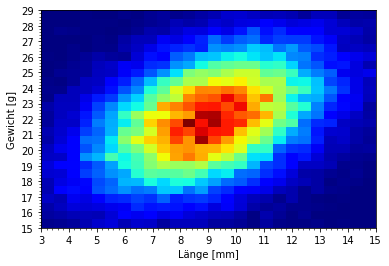

In [16]:
plt.hist2d(L, m, bins = [26,26], range=[[3,15], [15,29]], cmap=plt.cm.jet)
plt.xlabel("Länge [mm]")
plt.ylabel("Gewicht [g]")
plt.xticks(range(3,16))
plt.yticks(range(15,30))
plt.minorticks_on()
plt.show()


<font face="Times New Roman" size=4>
c) Dreidimensionales Histogramm (5P)
</font>

Wir wollen nun das Diagramm aus Teil b) in drei Dimensionen darstellen. Das funktioniert auf folgende Art und Weise. Zunächst müssen Sie einen Sub-Plot erstellen und für diesen die 3-dimensionale Projektion auswählen.

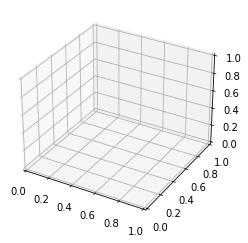

In [17]:
fig  = plt.figure()
ax   = fig.add_subplot(projection='3d')

**Achtung**: Der 3D Plot via `add_subplot` wird nur dann korrekt angezeigt, wenn Sie alles gemeinsam in einer Code Zelle ausführen. Die Zellen hier wurden zur Instruktion freigelassen, damit Sie jeden Schritt nacheinander erledigen können. Aber es ist ratsam, alles gleich in eine Zelle zu programmieren.

Danach erzeugen Sie das zweidimensionale Histogramm ähnlich wie in Teil (b), aber mit folgender Änderung: Sie verwenden `numpy`'s `histogram2d` Funktion anstelle der Methode von `pyplot` und Sie lassen sich die Datenpunkte und die Bingrenzen zurückgeben (c.f. https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html).

In [18]:
hist, xedges, yedges = np.histogram2d(L,m, bins=26, range=[[3,15], [15,29]])

Verwenden Sie nun `numpy`'s `meshgrid` Funktion um sich ein Grid von $x$ und $y$ Positionen erzeugen zu lassen. Beachten Sie, dass diese Position im Binmittelpunkt liegen sollten, Sie müssen also ggf. die Werte der Bingrenzen verschieben. Auf diese Weise bekommen Sie zwei zweidimensionale Listen die Sie mit `.ravel()` "flach machen" (also in eine 1-dimensionale Liste konvertieren) können. Die Werte entlang der $z$ Achse haben Sie bereits von `histogram2d` erhalten; auch hier müssen Sie die Liste aber noch verflachen.

In [19]:
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
xpos = xpos.ravel()
ypos = ypos.ravel()
zwerte=hist.ravel()

Erstellen Sie nun das 3d Histogram indem Sie `ax.bar3d` verwenden und es mit den $x$ und $y$ Positionen sowie den Binbreiten füttern. Für die $z$ Achse können Sie Position `zpos=0` verwenden, wobei die $z$-Werte dann als sechster Parameter übergeben werden.

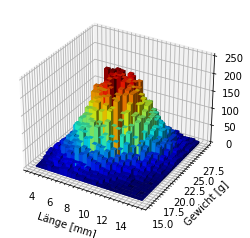

In [20]:
zpos = 0
dx = xedges[1]-xedges[0]
dy = yedges[1]-yedges[0]
cmap = plt.cm.get_cmap("jet")
colors = [cmap((n-np.min(zwerte))/np.max(zwerte)) for n in zwerte]
ax.bar3d(xpos, ypos, zpos, dx, dy, zwerte, color=colors)
ax.set_xlabel("Länge [mm]")
ax.set_ylabel("Gewicht [g]")
ax.set_zlabel("z")
ax.minorticks_on()
fig


Nehmen Sie nun den ganzen Code dieser Teilaufgabe und fassen Sie ihn in einer Funktion `make3dPlot` zusammen, die als Parameter nur die Datenliste aus Teil (b) und 4 Werte für `xmin`, `xmax`, `ymin`, `ymax` verwendet. Anhand dieser 4 Werte können Sie nun das Diagramm beschneiden, d.h. falls `xmin` gegeben ist, sollen nur die Datenpunkte mit $x>x_\text{min}$ angezeigt werden. Sie müssen dazu Ihren Code anpassen. Es gibt zwei Möglichkeiten: entweder setzen Sie die Werte der Bins im Histogramm gleich 0 oder Sie beschneiden die Daten, zB mit der folgenden Funktion:

In [21]:
def cutData(xdata, ydata, zdata, xmin=None, xmax=None, ymin=None, ymax=None):
    if len(xdata)!=len(ydata) or len(xdata)!=len(zdata): return xdata,ydata,zdata
    xnew, ynew, znew = [], [], []
    for i in range(len(xdata)):
        if xmin and xmin>xdata[i]: continue
        if xmax and xmax<xdata[i]: continue
        if ymin and ymin>ydata[i]: continue
        if ymax and ymax<ydata[i]: continue
        xnew.append(xdata[i])
        ynew.append(ydata[i])
        znew.append(zdata[i])
    return xnew, ynew, znew

In [22]:
def make3dPlot(xdata, ydata, xmin=None, xmax=None, ymin=None, ymax=None):
    if len(xdata) != len(ydata):
        return xdata, ydata
    xnew, ynew = [], []
    for i in range(len(xdata)):
        if xmin and xmin > xdata[i]:
            continue
        if xmax and xmax > xdata[i]:
            continue
        if ymin and ymin > ydata[i]:
            continue
        if ymax and ymax > ydata[i]:
            continue
        xnew.append(xdata[i])
        ynew.append(ydata[i])
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(projection="3d")
    hist, xedges, yedges = np.histogram2d(L, m, bins=26, range=[[3, 15], [15, 29]])
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zwerte = hist.ravel()
    zpos = 0
    dx = xedges[1]-xedges[0]
    dy = yedges[1]-yedges[0]
    cmap = plt.cm.get_cmap("jet")
    colors = [cmap((n-np.min(zwerte))/np.max(zwerte)) for n in zwerte]
    ax.bar3d(xpos, ypos, zpos, dx, dy, zwerte, color=colors)
    ax.set_xlabel("Länge [mm]")
    ax.set_ylabel("Gewicht [g]")
    ax.set_zlabel("z")
    ax.minorticks_on()
    
    return plt.show()


Erstellen Sie ein paar Diagramme in denen Sie die mit verschiedenen Schnitt-Parametern experimentieren.

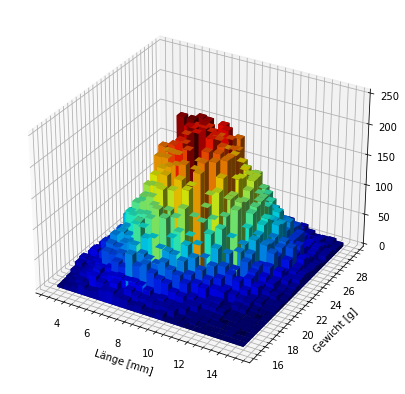

In [23]:
make3dPlot(L, m, xmin=1, xmax=7, ymin=11, ymax=29)

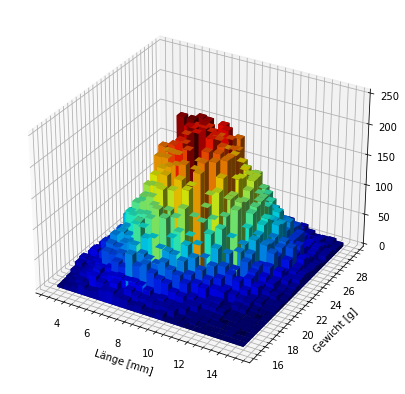

In [24]:
make3dPlot(L, m, xmin=0, xmax=4, ymin=1, ymax=29)

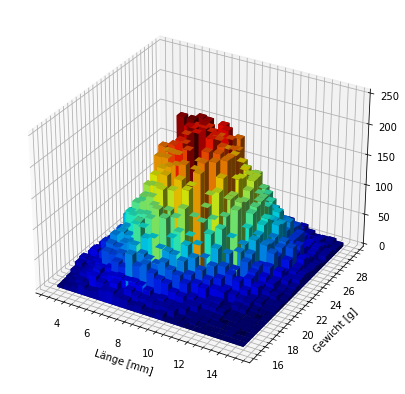

In [25]:
make3dPlot(L, m, xmin=10, xmax=29, ymin=11, ymax=30)